In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (10,7)

### 1) A:
A normal, or gaussian, distributions are useful to representing random variables with an unknown distribution, such as instrument noise. Their probability density function is

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

where $\sigma^2$ is the variance, which represents the "width" of the distribution, and $\mu$ is the mean, where the distribution is centered.
### B:
Using the CDF function, we can find the probability of finding a result between negative infinity and some value by integrating over the distribution. This value is called X$\sigma$, where X is the value divided by $\sigma$.

From the z table, we expect the probability for 1$\sigma$ to be 0.15866, 2$\sigma$ to be 0.02275, and 3$\sigma$ to be 0.00135.

In [45]:
p1 = stats.norm.cdf(-1, 0, 1)
p2 = stats.norm.cdf(-2, 0, 1)
p3 = stats.norm.cdf(-3, 0, 1)
print(f'The probability for 1 sigma is {p1:.5f}')
print(f'The probability for 2 sigma is {p2:.5f}')
print(f'The probability for 3 sigma is {p3:.5f}')

The probability for 1 sigma is 0.15866
The probability for 2 sigma is 0.02275
The probability for 3 sigma is 0.00135


These values match those expected from the z table.

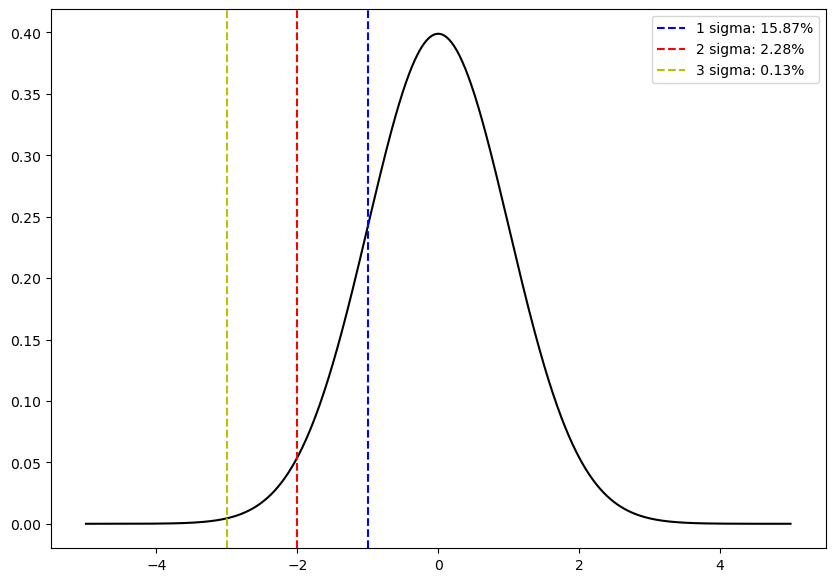

In [40]:
# Plotting the values of 1, 2, and 3 sigma on a normal distribution
fig, ax = plt.subplots()
x = np.linspace(-5, 5, 1000)
ax.plot(x, stats.norm.pdf(x, 0, 1), c='k')
ax.axvline(-1, linestyle='--', c='b', label=f'1 sigma: {p1*100:.2f}%')
ax.axvline(-2, linestyle='--', c='r', label=f'2 sigma: {p2*100:.2f}%')
ax.axvline(-3, linestyle='--', c='y', label=f'3 sigma: {p3*100:.2f}%')
ax.legend()

### C:

Using the PPF function, we can do the inverse and find the X$\sigma$ value for a normal distribution corresponding to some probability. Using the values from the z table, we should get the same $\sigma$ values as before.

In [53]:
# Taking absolute value, since cdf() and ppf() integrate from negative infinity and gives a negative sigma value.
print(f'A probability of 0.15866 corresponds to {np.abs(stats.norm.ppf(0.15866)):.5f} sigma.')
print(f'A probability of 0.02275 corresponds to {np.abs(stats.norm.ppf(0.02275)):.5f} sigma.')
print(f'A probability of 0.00135 corresponds to {np.abs(stats.norm.ppf(0.00135)):.5f} sigma.')

A probability of 0.15866 corresponds to 0.99998 sigma.
A probability of 0.02275 corresponds to 2.00000 sigma.
A probability of 0.00135 corresponds to 2.99998 sigma.
A probability of 0.51 corresponds to 0.02507 sigma.


These values match the expected values, save for rounding errors.

### D:

The scipy functions integrate from negative infinity to positive infinity, so if the probability is below 50%, the sigma value will land on the left side of the distribution. Since the distribution is centered on 0 by default, this means the sigma value will be negative. Since normal distributions are symmetric, this value is the same as integrating from positive infinity but the sign is flipped.